In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the IVP
def f(t, y):
    return -2 * y + torch.sin(t)

# Generate training data
t_data = torch.linspace(0, 10, 1000, requires_grad=False)  # Time values
y_data = torch.exp(-2 * t_data)  # True solution to the IVP (for comparison)

# Create a noisy dataset for training
torch.manual_seed(0)
y_data_noisy = y_data + 0.1 * torch.randn(len(t_data))

In [2]:
# Define the ANN model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [3]:
# Instantiate the model
model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(t_data.view(-1, 1))
    loss = criterion(outputs, y_data_noisy.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

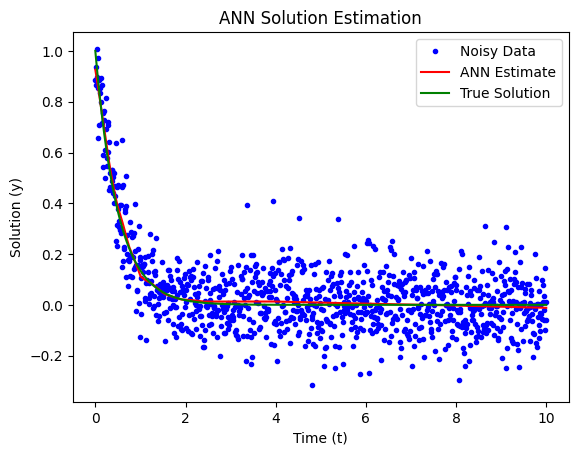

In [4]:
# Estimate the solution using the trained ANN
t_test = torch.linspace(0, 10, 200, requires_grad=False)  # Test time values
y_pred = model(t_test.view(-1, 1))

# Convert the results to NumPy arrays for plotting
t_test = t_test.detach().numpy()
y_pred = y_pred.detach().numpy()
y_data_noisy = y_data_noisy.detach().numpy()
y_data = y_data.detach().numpy()

# Plot the true solution, noisy data, and ANN's estimate
plt.figure()
plt.plot(t_data, y_data_noisy, 'b.', label='Noisy Data')
plt.plot(t_test, y_pred, 'r', label='ANN Estimate')
plt.plot(t_data, y_data, 'g', label='True Solution')
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel('Solution (y)')
plt.title('ANN Solution Estimation')
plt.show()